In [1]:

import sys
print("Python Version")
print(sys.version)

Python Version
3.10.7 (tags/v3.10.7:6cc6b13, Sep  5 2022, 14:08:36) [MSC v.1933 64 bit (AMD64)]


In [2]:
# !pip install pandas
# !pip install tensorflow
# !pip install matplotlib
# !pip install seaborn
# !pip install scikit-learn
# !pip install nltk
# !pip install gensim
# !pip install wordcloud

In [3]:
# Import required packages

# Python Standard Packages

import re
import pickle

# External Packages

import numpy as np
import pandas as pd
import tensorflow as tf

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# For model building
import keras
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout, Activation
# Menggunakan tensorflow.keras.utils
from tensorflow.keras.utils import to_categorical

# For model selection & evaluation
import sklearn
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.model_selection import train_test_split

# For text cleaning & preprocessing
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk import sent_tokenize, word_tokenize, pos_tag
from bs4 import BeautifulSoup

# To generate word2vec embeddings
from gensim.models import word2vec, Word2Vec
from gensim.models.keyedvectors import KeyedVectors

# Generating WordClouds
import wordcloud
from wordcloud import WordCloud

nltk.download("punkt")
nltk.download('stopwords')
nltk.download("vader_lexicon")

[nltk_data] Downloading package punkt to C:\Users\Mochammad
[nltk_data]     Athian\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Mochammad
[nltk_data]     Athian\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to C:\Users\Mochammad
[nltk_data]     Athian\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [4]:
!pip install openpyxl

In [5]:
# Load the dataset
df_new = pd.read_excel('https://github.com/nanahsn/TA/blob/main/Dataset%20fix.xlsx?raw=true')
df_new.drop_duplicates(keep=False, inplace=True)
df_new

,text,sentiment
0,"""Indonesia sudah targetkan untuk mulai produks...",1.0
1,"""LEGA. MANTAP. TOYOTA akhirnya mengumumkan k...",1.0
2,"""Pilihan saya masih sama, Sir, mobil listrik. ...",1.0
3,#Aptera sebagai startup mobil listrik asal Ame...,1.0
4,#Balapan mobil terbang yang biasanya hanya ada...,1.0
...,...,...
4759,â€˜itu mobil listrik kalo kena hujan gimana?â€...,1.0
4760,â€” Ia tak tahu banyak tentang mobil... tapi ...,1.0
4761,"â€”dibandingkan berpergian secara terpisah, be...",1.0
4762,ðŸ˜¬ KRL mau dimahalin mobil listrik malah mau...,2.0


In [6]:
# Replacing the values.
df_new['sentiment'] = df_new['sentiment'].replace(4,1)

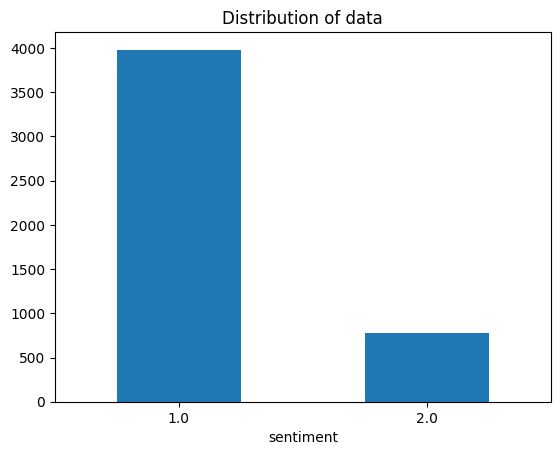

In [7]:
ax = df_new.groupby('sentiment').count().plot(kind='bar', title='Distribution of data',
                                               legend=False)
ax = ax.set_xticklabels(['1.0','2.0'], rotation=0)

In [8]:
df_new.dropna(subset=['sentiment'], inplace=True)

In [9]:
!pip install -U imbalanced-learn

In [10]:
from tkinter.constants import Y
from imblearn.over_sampling import RandomOverSampler

X = df_new[['text']]
Y = df_new['sentiment']
ros = RandomOverSampler(random_state=1)
X_new, y_new = ros.fit_resample(X,Y)

In [11]:
df_new= X_new
df_new['sentiment'] = y_new

In [12]:
pos = []
neg = []
for l in df_new.sentiment:
    if l == 1:
        pos.append(1)
        neg.append(2)
    elif l == 2:
        pos.append(1)
        neg.append(2)

<Axes: xlabel='sentiment', ylabel='count'>

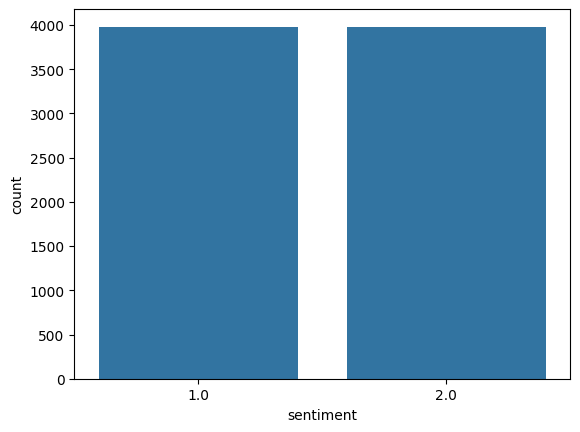

In [13]:
sns.countplot(data=df_new, x='sentiment')

In [14]:
df_new['Pos']= pos
df_new['Neg']= neg

In [15]:
from bs4 import BeautifulSoup
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

nltk.download('punkt')

def cleanReview(review, remove_stopwords=False, stemming=False):
    review = re.sub(r'https?://\S+|www\.\S+', '<url>', review)  # Replacing URLs
    review = re.sub(r'@\w+', '<user>', review)  # Replacing Usernames
    review = re.sub(r'[^a-zA-Z0-9\s]', '', review) # Removing Non-Alphabets
    review = re.sub(r"[@][\w_-]+","", review) # remove mention @
    review = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", review).split()) # remove link, hashtag

    # Function to remove numbers
    def remove_number(review):
        return re.sub(r"\d+", "", review)

    # Function to remove punctuation
    def remove_punctuation(review):
        return review.translate(str.maketrans("", "", string.punctuation))

    # Tokenizing the text
    words = nltk.word_tokenize(review)

    if remove_stopwords:
        stop_words = set(stopwords.words("indonesian"))
        additional_stopwords = ["yg", "dg", "rt", "dgn", "ny", "d", 'klo', 'kalo', 'amp', 'biar', 'bikin', 'bilang',
                               'gak', 'ga', 'krn', 'nya', 'nih', 'sih', 'si', 'tau', 'tdk', 'tuh', 'utk', 'ya',
                               'jd', 'jgn', 'sdh', 'aja', 'n', 't', 'nyg', 'hehe', 'pen', 'u', 'nan', 'loh', 'rt',
                               '&amp', 'yah', 'gtgt', 'ltlt']
        stop_words.update(additional_stopwords)
        words = [word for word in words if word.lower() not in stop_words]

    if stemming:
        stemmer = PorterStemmer()
        words = [stemmer.stem(word) for word in words]

    return words

# Suppose "text" is the column name containing text in the dataframe df_new
df_new['cleaned_text'] = df_new['text'].apply(lambda x: cleanReview(x, remove_stopwords=True, stemming=True))


[nltk_data] Downloading package punkt to C:\Users\Mochammad
[nltk_data]     Athian\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [16]:
df_new


,text,sentiment,Pos,Neg,cleaned_text
0,"""Indonesia sudah targetkan untuk mulai produks...",1.0,1,2,"[indonesia, targetkan, produksi, baterai, ev, ..."
1,"""LEGA. MANTAP. TOYOTA akhirnya mengumumkan k...",1.0,1,2,"[lega, mantap, toyota, mengumumkan, keseriusan..."
2,"""Pilihan saya masih sama, Sir, mobil listrik. ...",1.0,1,2,"[pilihan, sir, mobil, listrik, perlahan, mengg..."
3,#Aptera sebagai startup mobil listrik asal Ame...,1.0,1,2,"[aptera, startup, mobil, listrik, amerika, ser..."
4,#Balapan mobil terbang yang biasanya hanya ada...,1.0,1,2,"[balapan, mobil, terbang, permainan, comput, f..."
...,...,...,...,...,...
7955,Susahnya isi bensin mobil listrik ðŸ¤£,2.0,1,2,"[susahnya, isi, bensin, mobil, listrik]"
7956,"#MostPopuler Repotnya Mobil Listrik Kebakaran,...",2.0,1,2,"[mostpopul, repotnya, mobil, listrik, kebakara..."
7957,"orang kaya tuh bukan naik KRL, orang kaya tuh ...",2.0,1,2,"[orang, kaya, krl, orang, kaya, beli, mobil, l..."
7958,Penjualan Mobil Porsche Taycan Listrik Turun 3...,2.0,1,2,"[penjualan, mobil, porsch, taycan, listrik, tu..."


Memproses Ukuran Embedding: 100
Melatih untuk Fold 1
Vocabulary Length: 25482
Shape of embedding matrix :  (25482, 100)




50/50 [==============================] - 7s 126ms/step
Fold 1 - Accuracy: 0.8285, Precision: 0.8115, Recall: 0.8420, F1 Score: 0.8264
Melatih untuk Fold 2
Vocabulary Length: 25482
Shape of embedding matrix :  (25482, 100)
50/50 [==============================] - 9s 174ms/step
Fold 2 - Accuracy: 0.8329, Precision: 0.8463, Recall: 0.8074, F1 Score: 0.8264
Melatih untuk Fold 3
Vocabulary Length: 25482
Shape of embedding matrix :  (25482, 100)
50/50 [==============================] - 4s 76ms/step
Fold 3 - Accuracy: 0.8505, Precision: 0.8390, Recall: 0.8869, F1 Score: 0.8623
Melatih untuk Fold 4
Vocabulary Length: 25482
Shape of embedding matrix :  (25482, 100)
50/50 [==============================] - 4s 82ms/step
Fold 4 - Accuracy: 0.8448, Precision: 0.8320, Recall: 0.8719, F1 Score: 0.8515
Melatih untuk Fold 5
Vocabulary Length: 25482
Shape of embedding matrix :  (25

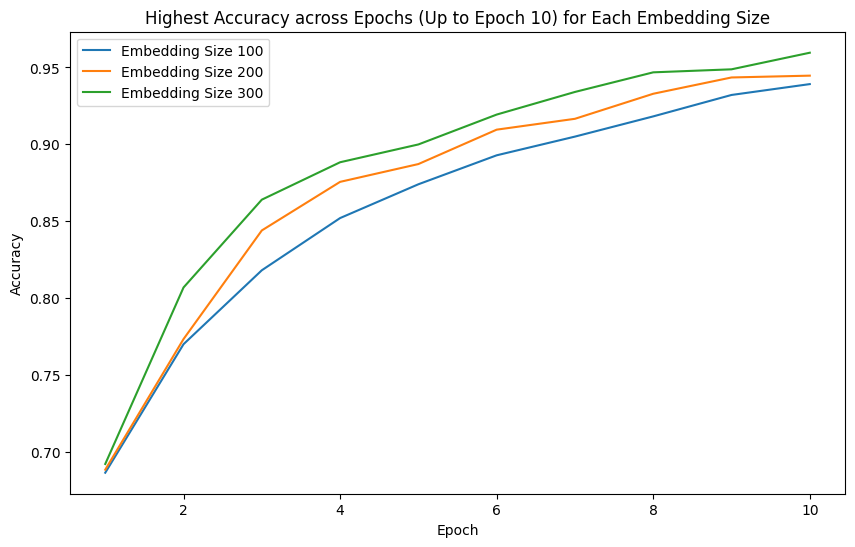

Embedding Size 100 - Average Accuracy: 0.8725
Embedding Size 200 - Average Accuracy: 0.8838
Embedding Size 300 - Average Accuracy: 0.8838


In [17]:
from gensim.models import Word2Vec
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Assuming df_new is your DataFrame containing 'text' column
X_data = df_new['text'].values
y_data = df_new['sentiment'].values

# Pembagian setiap teks dalam X_data menjadi daftar kata-kata terpisah
Word2Vec_training_data = list(map(lambda x: x.split(), X_data))

best_accuracy = 0
best_precision = 0
best_recall = 0
best_f1 = 0
best_embedding_size = 0

embedding_sizes = [100, 200, 300]
num_folds = 5
epochs = 10
batch_size = 32
MAX_SEQUENCE_LENGTH = 100

best_metrics = {}

# Membuat grafik
for embed_size in embedding_sizes:
    accuracies = []
    precisions = []
    recalls = []
    f1_scores = []
    accuracy_epochs = []

    print(f"Memproses Ukuran Embedding: {embed_size}")
    fold_no = 1
    kf = KFold(n_splits=num_folds, shuffle=True)

    for train_index, val_index in kf.split(X_data):
        print(f"Melatih untuk Fold {fold_no}")
        X_train_fold, X_val_fold = X_data[train_index], X_data[val_index]
        y_train_fold, y_val_fold = y_data[train_index], y_data[val_index]

        w2v = Word2Vec(Word2Vec_training_data,
                        vector_size=embed_size,
                        window=5,
                        workers=4,
                        epochs=20,
                        sg=0,  # CBOW
                        min_count=1)
        w2v.save("w2v")
        print("Vocabulary Length:", len(w2v.wv.key_to_index))

        def transformReviews(reviews, w2v_model, embed_size):
          num_reviews = len(reviews)
          transformedReviewFeat = np.zeros((num_reviews, embed_size), dtype=float)

          for idx, review in enumerate(reviews):
              review_feat = np.zeros((embed_size,), dtype=float)
              word_count = 0

              for word in review:
                  if word in w2v_model.wv:
                      review_feat += w2v_model.wv[word]
                      word_count += 1

              if word_count != 0:
                  review_feat /= word_count

              transformedReviewFeat[idx] = review_feat

          return transformedReviewFeat

        # Pre-process Training Reviews
        X_train_cleaned = [cleanReview(review, remove_stopwords=True) for review in X_train_fold]
        train_vectors = transformReviews(X_train_cleaned, w2v, embed_size)

        # Pre-process Validation Reviews
        X_test_cleaned = [cleanReview(review, remove_stopwords=True) for review in X_val_fold]
        val_vectors = transformReviews(X_test_cleaned, w2v, embed_size)

        # Load trained Word2Vec model
        w2v = Word2Vec.load("w2v")
        embedding_matrix = w2v.wv.vectors
        print("Shape of embedding matrix : ", embedding_matrix.shape)

        # Mapping labels to 0 and 1
        y_train_fold[y_train_fold == 2] = 0
        y_train_fold[y_train_fold == 1] = 1
        y_val_fold[y_val_fold == 2] = 0
        y_val_fold[y_val_fold == 1] = 1

        # Convert labels to one-hot encoded format
        tokenizer = Tokenizer(num_words=embedding_matrix.shape[0])  # Rename 'nb_words' to 'num_words'
        tokenizer.fit_on_texts(X_train_fold)
        train_seq = tokenizer.texts_to_sequences(X_train_fold)
        test_seq = tokenizer.texts_to_sequences(X_val_fold)

        X_train_fold_seq = sequence.pad_sequences(train_seq, maxlen=100)
        X_val_fold_seq = sequence.pad_sequences(test_seq, maxlen=100)
        y_train_fold_encoded = to_categorical(y_train_fold, num_classes=2)
        y_val_fold_encoded = to_categorical(y_val_fold, num_classes=2)

        # Model: Bidirectional LSTM with Word2Vec Embeddings
        model = Sequential([
            Embedding(embedding_matrix.shape[0], embedding_matrix.shape[1], weights=[embedding_matrix], input_length=MAX_SEQUENCE_LENGTH, trainable=False),
            Bidirectional(LSTM(128, dropout=0.2, recurrent_dropout=0.2)),
            Dense(2, activation='softmax')
        ])

        for epoch in range(epochs):
            model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
            history = model.fit(X_train_fold_seq, y_train_fold_encoded, batch_size=32, epochs=1, verbose=1, validation_split=0.2)
            accuracy_epochs.append(history.history['accuracy'][-1])  # Tambahkan akurasi untuk epoch terakhir

        # Validation predictions
        y_pred = model.predict(X_val_fold_seq)
        y_pred_classes = np.argmax(y_pred, axis=1)

        # Calculate metrics
        accuracy = accuracy_score(y_val_fold, y_pred_classes)
        precision = precision_score(y_val_fold, y_pred_classes)
        recall = recall_score(y_val_fold, y_pred_classes)
        f1 = f1_score(y_val_fold, y_pred_classes)

        accuracies.append(accuracy)
        precisions.append(precision)
        recalls.append(recall)
        f1_scores.append(f1)

        # Memperbarui nilai terbaik jika nilai saat ini lebih baik
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_precision = precision
            best_recall = recall
            best_f1 = f1
            best_embedding_size = embed_size

        print(f"Fold {fold_no} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")

        accuracy_epochs.append(history.history['accuracy'][-1])  # Simpan akurasi dari epoch terakhir
        fold_no += 1

    # Calculate average metrics across folds
    avg_accuracy = np.mean(accuracies)
    avg_precision = np.mean(precisions)
    avg_recall = np.mean(recalls)
    avg_f1 = np.mean(f1_scores)

    if avg_accuracy > best_accuracy:
        best_accuracy = avg_accuracy
        best_precision = avg_precision
        best_recall = avg_recall
        best_f1 = avg_f1
        best_embedding_size = embed_size

    print(f"\nAverage Metrics for Embedding Size {embed_size}:")
    print(f"Average Accuracy: {avg_accuracy:.4f}")
    print(f"Average Precision: {avg_precision:.4f}")
    print(f"Average Recall: {avg_recall:.4f}")
    print(f"Average F1 Score: {avg_f1:.4f}\n")

    # Simpan metrik terbaik untuk setiap ukuran embedding
    best_metrics[embed_size] = {
        'accuracy': best_accuracy,
        'precision': best_precision,
        'recall': best_recall,
        'f1': best_f1,
        'accuracy_epochs': accuracy_epochs  # Simpan akurasi pada setiap epoch
    }

# Plotting the highest accuracy for each embedding size up to epoch 10
embedding_sizes_str = [str(size) for size in embedding_sizes]
plt.figure(figsize=(10, 6))

for embed_size in embedding_sizes:
    accuracy_epochs = best_metrics[embed_size]['accuracy_epochs'][:10]  # Selecting only up to epoch 10
    plt.plot(range(1, len(accuracy_epochs) + 1), accuracy_epochs, label=f'Embedding Size {embed_size}')

plt.title('Highest Accuracy across Epochs (Up to Epoch 10) for Each Embedding Size')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Displaying accuracy values in text
for embed_size in embedding_sizes:
    avg_accuracy = best_metrics[embed_size]['accuracy']
    print(f"Embedding Size {embed_size} - Average Accuracy: {avg_accuracy:.4f}")

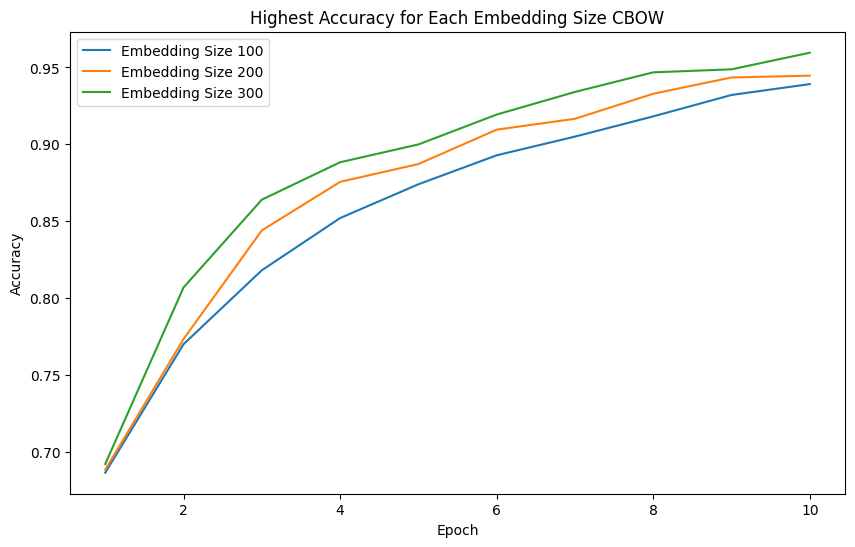

Embedding Size 100 - Average Accuracy: 0.8725
Embedding Size 200 - Average Accuracy: 0.8838
Embedding Size 300 - Average Accuracy: 0.8838


In [18]:
# Plotting the highest accuracy for each embedding size up to epoch 10
embedding_sizes_str = [str(size) for size in embedding_sizes]
plt.figure(figsize=(10, 6))

for embed_size in embedding_sizes:
    accuracy_epochs = best_metrics[embed_size]['accuracy_epochs'][:10]  # Selecting only up to epoch 10
    plt.plot(range(1, len(accuracy_epochs) + 1), accuracy_epochs, label=f'Embedding Size {embed_size}')

plt.title('Highest Accuracy for Each Embedding Size CBOW')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Displaying accuracy values in text
for embed_size in embedding_sizes:
    avg_accuracy = best_metrics[embed_size]['accuracy']
    print(f"Embedding Size {embed_size} - Average Accuracy: {avg_accuracy:.4f}")